# Лабораторна робота №5
Завантажте набір даних по медичному страхуванню за посиланням

За рахунок зміни гіперпараметрів нейронної мережі спробуйте досягнути найменшого значення функції втрат (mae).

Підготувати необхідні файли для захисту , за прикладом попередньої лабораторної роботи, але не викладати їх в репозиторій github до моменту захисту лабораторної роботи.
Викласти результати в репозиторій під час захисту лабораторної роботи.

## First model

In [1]:
# Import required libraries
import tensorflow as tf

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv('data_for_lab5.csv')

In [3]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [5]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [7]:
# Стандартизуємо дані
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set random state for reproducible splits

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

In [9]:
# Fit the model
history = insurance_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 19ms/step - loss: 13345.8340 - mae: 13345.8340 - val_loss: 12967.7568 - val_mae: 12967.7568
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 13345.2451 - mae: 13345.2451 - val_loss: 12967.1084 - val_mae: 12967.1084
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 13344.4902 - mae: 13344.4902 - val_loss: 12966.2119 - val_mae: 12966.2119
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13343.3809 - mae: 13343.3809 - val_loss: 12964.8076 - val_mae: 12964.8076
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13341.5459 - mae: 13341.5459 - val_loss: 12962.3818 - val_mae: 12962.3818
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 13338.2695 - mae: 13338.2695 - val_loss: 12957.9561 - val_mae: 12957.9561
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 13332.1650 - mae: 13332.1650 - val_loss: 129

In [10]:
# Виведемо інформацію про модель
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3198.5579 - mae: 3198.5579


[3198.557861328125, 3198.557861328125]

Training Loss: 3490.251953125, Training MSE: 3490.251953125
Test Loss: 3198.557861328125, Test MSE: 3198.557861328125


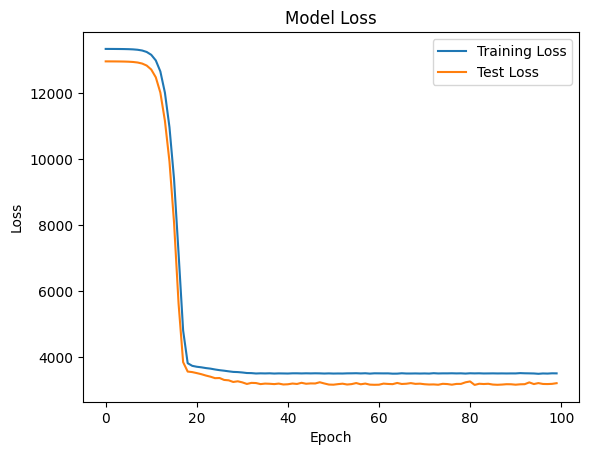

In [12]:
# Оцінимо результати навчання
train_loss = insurance_model.evaluate(X_train, y_train, verbose=0)
test_loss = insurance_model.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss[0]}, Training MSE: {train_loss[1]}')
print(f'Test Loss: {test_loss[0]}, Test MSE: {test_loss[1]}')

# Візуалізуємо результати навчання
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Second Model

In [13]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
    metrics=['mae'])

In [14]:
# Fit the model and save the history (we can plot this)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100


34/34 [==============================] - 2s 3ms/step - loss: 13345.8115 - mae: 13345.8115
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13344.8877 - mae: 13344.8877
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13342.7686 - mae: 13342.7686
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13337.6953 - mae: 13337.6953
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13327.2607 - mae: 13327.2607
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13308.8584 - mae: 13308.8584
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 13280.0303 - mae: 13280.0303
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13238.2559 - mae: 13238.2559
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 13181.5576 - mae: 13181.5576
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 13107.5908 - mae: 13

In [15]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3160.8958 - mae: 3160.8958


[3160.895751953125, 3160.895751953125]

Training Loss: 3470.702392578125, Training MSE: 3470.702392578125
Test Loss: 3160.895751953125, Test MSE: 3160.895751953125


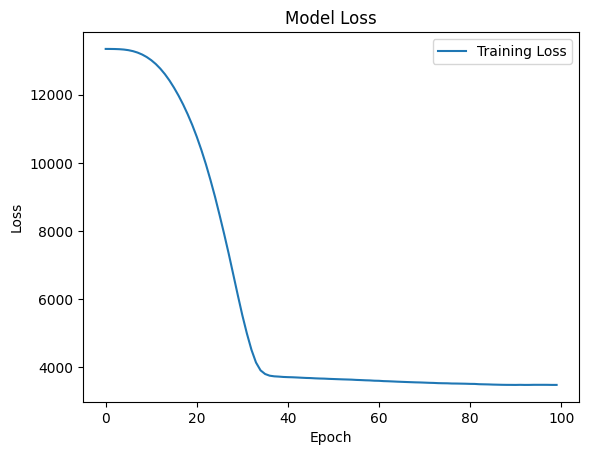

In [16]:
# Оцінимо результати навчання
train_loss_2 = insurance_model_2.evaluate(X_train, y_train, verbose=0)
test_loss_2 = insurance_model_2.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss_2[0]}, Training MSE: {train_loss_2[1]}')
print(f'Test Loss: {test_loss_2[0]}, Test MSE: {test_loss_2[1]}')

# Візуалізуємо результати навчання
plt.plot(history_2.history['loss'], label='Training Loss')
# plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Third Model

In [17]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  # tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001),
    metrics=['mae'])

In [18]:
# Fit the model and save the history (we can plot this)
history_3 = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200


34/34 [==============================] - 2s 3ms/step - loss: 13345.8301 - mae: 13345.8301
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13344.9014 - mae: 13344.9014
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13342.6631 - mae: 13342.6631
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13337.2490 - mae: 13337.2490
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13326.2676 - mae: 13326.2676
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13307.1318 - mae: 13307.1318
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 13277.4297 - mae: 13277.4297
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 13234.7109 - mae: 13234.7109
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 13176.9629 - mae: 13176.9629
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 13101.8535 - mae: 13

In [19]:
# Evaluate our larger model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3156.0547 - mae: 3156.0547


[3156.0546875, 3156.0546875]

Training Loss: 3470.619140625, Training MSE: 3470.619140625
Test Loss: 3156.0546875, Test MSE: 3156.0546875


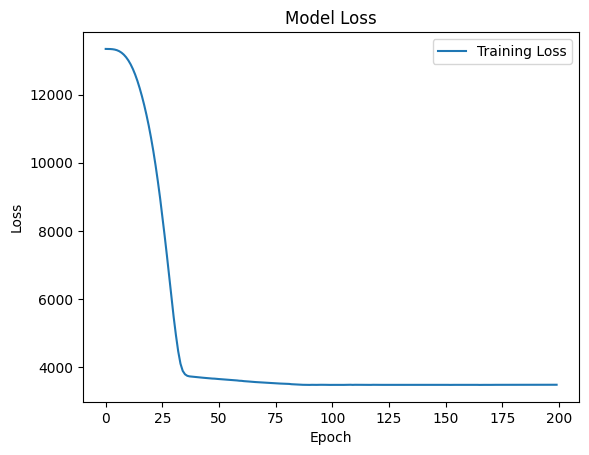

In [20]:
# Оцінимо результати навчання
train_loss_3 = insurance_model_3.evaluate(X_train, y_train, verbose=0)
test_loss_3 = insurance_model_3.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss_3[0]}, Training MSE: {train_loss_3[1]}')
print(f'Test Loss: {test_loss_3[0]}, Test MSE: {test_loss_3[1]}')

# Візуалізуємо результати навчання
plt.plot(history_3.history['loss'], label='Training Loss')
# plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Comparison

In [21]:
loss_1, mae_1 = insurance_model.evaluate(X_test, y_test)
loss_2, mae_2 = insurance_model_2.evaluate(X_test, y_test)
loss_3, mae_3 = insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3156.0547 - mae: 3156.0547


In [22]:
model_results = [["insurance_model", loss_1, mae_1],
                 ["insurance_model_2", loss_2, mae_2],
                 ["insurance_model_3", loss_3, mae_3]]

all_results = pd.DataFrame(model_results, columns=["model", "loss", "mae"])
all_results

,model,loss,mae
0,insurance_model,3198.557861,3198.557861
1,insurance_model_2,3160.895752,3160.895752
2,insurance_model_3,3156.054688,3156.054688
